In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

In [ ]:
df.head()

In [26]:
df["Index"].value_counts()

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

In [27]:
df["Index"] = df["Index"].map({
    0: "Extremely Weak",
    1: "Weak",
    2: "Normal",
    3: "Overweight",
    4: "Obesity",
    5: "Extreme Obesity"
})

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(x="Index", data=df)
plt.show()

In [ ]:
sns.lmplot(x="Height", y="Weight", hue="Index", data=df)

In [34]:
dummy = pd.get_dummies(df["Gender"])

In [36]:
dummy["Female"] = dummy["Female"].map({False: 0, True: 1})
dummy["Male"] = dummy["Male"].map({False: 0, True: 1})

In [38]:
df = pd.concat([dummy, df], axis=1)

In [40]:
df.drop("Gender", axis=1, inplace=True)

In [ ]:
df.head()

In [43]:
X = df.drop("Index", axis=1)
y = df["Index"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = rf.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.85

<AxesSubplot: >

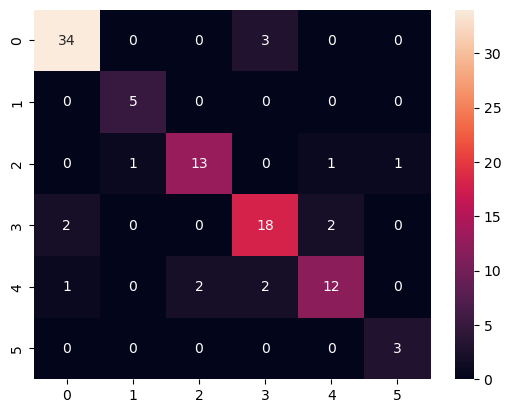

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")

In [51]:
pickle.dump(rf, open("rf.pkl", "wb"))